<a href="https://colab.research.google.com/github/Shresth-Mehta/Neural_Networks_API/blob/master/K_Means_Clustering_with_anomalous_init.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import random 
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

In [0]:
class KMeans_:
  def __init__(self,n_clusters,in_centeroid,epochs,initial,p,use_weights,beta):
    self.n_clusters=n_clusters
    self.clusters=[]
    self.in_centeroid=in_centeroid
    self.epochs=epochs
    self.initial=initial
    self.p=p
    self.use_weights=use_weights
    self.w=None
    self.beta=beta

  def __add_cluster(self,head_point):
    self.clusters.append(Cluster(head_point)) 

  def __get_distance(self,dp1,dp2):
    if(self.use_weights==True):
      return np.sum(((self.w)**beta)*np.abs(dp1-dp2)**self.p)
    return np.sum(np.abs(dp1-dp2)**self.p)

  def pred(self,datapoint):
    return np.argmin([self.__get_distance(datapoint, cluster.centeroid) for cluster in self.clusters])

  def __update_weights(self):
    return

    
  def fit(self,X):
    if(self.initial=='iK'):
      if(self.use_weights==True):
        self.w=np.random.random(X[0].shape)
      invalid_points=[]
      num_itr=1
      while(len(invalid_points)!=len(X)):
        max_distance=-1
        max_index=-1
        for i,datapoint in enumerate(X):
          if(i not in invalid_points):
            dis=self.__get_distance(datapoint,self.in_centeroid)
            if(dis>=max_distance):
              max_distance=dis
              max_index=i
        #invalid_points.append(max_index)
        self.__add_cluster(X[max_index])
        self.clusters[-1].empty()
        prev_centeroid=self.clusters[-1].centeroid
        while(True):
          invalid_2=[]
          for i,datapoint in enumerate(X):
            #datapoint=np.reshape(datapoint,(*x[0].shape,1))
            if(i not in invalid_points):
              dis_cluster=self.__get_distance(datapoint,self.clusters[-1].centeroid)
              dis_in_centeroid=self.__get_distance(datapoint,self.in_centeroid)
              if(dis_in_centeroid>=dis_cluster):
                self.clusters[-1].add_datapoint(datapoint)
                invalid_2.append(i)
          current_centeroid=self.clusters[-1].calc_mean()
          #update the weights
          if(self.use_weights==True):
            self.__update_weights()
          #print(prev_centeroid,current_centeroid,self.clusters[-1].get_size())
          
          if(np.all(prev_centeroid==current_centeroid)):
            #print("yes",current_centeroid)
            for j in invalid_2:
              invalid_points.append(j)
            break
          else:
            #print("no",current_centeroid)
            prev_centeroid=current_centeroid
            self.clusters[-1].empty()
        #print(len(invalid_points),self.clusters[0].get_size())
        #break #added
      if(self.n_clusters!=None and len(self.clusters)>self.n_clusters):
        #select n greatest clusters and remove the rest 
        self.clusters.sort(key=lambda p:p.get_size(),reverse=True)
        rem_index=-1
        for index in range(len(self.clusters)):
          if(index>self.n_clusters-1):
            rem_index=index
            break
        del self.clusters[rem_index:]
      for cluster in self.clusters:
        cluster.calc_mean()
        cluster.empty() 

    invalid_points=[]
    old_means=[]
    for cluster in self.clusters:
      old_means.append(cluster.centeroid)
    for epoch in range(self.epochs):
      for i,datapoint in enumerate(X):
        self.clusters[self.pred(datapoint)].add_datapoint(datapoint)
        #self.clusters[self.pred(datapoint)].calc_mean() #added this
      new_means=[]
      for cluster in self.clusters:
        new_means.append(cluster.calc_mean())
        cluster.empty()
      same=0
      for mean_1,mean_2 in zip(new_means,old_means):
        #print(mean_1,mean_2)
        if(np.all(mean_1==mean_2)):
          same+=1
      old_means.clear()
      for mean in new_means:
        old_means.append(mean)  
      #print(same)
      if(self.use_weights==True):
        self.__update_weights()
      if(same==len(new_means)):
        print("Converged after:",epoch,"epochs")
        break
        
  
  def get_cluster_elements(self,X,cluster_number):
    ans=[]
    for datapoint in X:
      if(cluster_number==self.pred(datapoint)):
        ans.append(datapoint)
    #print(len(ans))
    return ans
  def cluster_centers(self):
    ans=[]
    for cluster in self.clusters:
      ans.append(cluster.centeroid)
    return ans
  def labels(self,X):
    ans=[]
    for datapoint in X:
      ans.append(self.pred(datapoint))
    return ans
  def accuracy(self,Y,X):
    pred_diff=list(Y-self.labels(X))
    correct=pred_diff.count(0)
    accuracy=correct*100/len(Y)
    return accuracy

In [0]:
class Cluster:
  def __init__(self,head_point):
    self.centeroid=head_point
    self.cluster_members=[head_point]
  def calc_mean(self):
    sum=0
    for f_vector in self.cluster_members:
      sum+=f_vector
    if(self.get_size()!=0):
      self.centeroid=np.divide(sum,self.get_size())
    else: print("size=0")
    return self.centeroid
  def add_datapoint(self,datapoint):
    self.cluster_members.append(datapoint)
    #self.calc_mean()
  def empty(self):
    self.cluster_members=[]
  def get_size(self):
    return len(self.cluster_members)

In [0]:
import sklearn 
from sklearn.cluster import KMeans
#from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
#import sklearn.metrics as sm
from sklearn import datasets
#from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline

# getting data


In [0]:
iris=datasets.load_iris()
x=scale(iris.data)
y=pd.DataFrame(iris.target)
variable_names=iris.feature_names
a=np.reshape(x,(150,4,1))
b=list(a)
iris_df=pd.DataFrame(iris.data)
iris_df.columns=['Sepal_Length','Sepal_Width','Petal_length','Petal_Width']
y.columns=['target']
c=iris.target

In [0]:
def data_mean(b):
  grand_mean=0
  for point in b:
    grand_mean+=point
  return grand_mean/len(b)

In [0]:
print(data_mean(b))

[[-1.69031455e-15]
 [-1.84297022e-15]
 [-1.69864123e-15]
 [-1.40924309e-15]]


# Library Implementation


In [0]:
clustering=KMeans(n_clusters=3,random_state=5)
clustering.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [0]:
clustering.cluster_centers_

array([[-0.05021989, -0.88337647,  0.34773781,  0.2815273 ],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [ 1.13597027,  0.08842168,  0.99615451,  1.01752612]])

# My Implementation

In [0]:
my_clustering=KMeans_(3,data_mean(b),100,'iK',2,False,0)
my_clustering.fit(b)
#n_clusters,in_centeroid,epochs,initial,p

Converged after: 4 epochs


In [0]:
len(my_clustering.clusters)
for s in my_clustering.clusters:
  print(s.centeroid,s.get_size())

[[1.03359865]
 [0.00613858]
 [0.94360463]
 [0.9725624 ]] 0
[[-1.00206653]
 [ 0.90625492]
 [-1.30310821]
 [-1.25634413]] 0
[[-0.16840578]
 [-0.9726981 ]
 [ 0.2598706 ]
 [ 0.17543327]] 0


In [0]:
for i in range(3):
  print(len(my_clustering.get_cluster_elements(b,i)))

55
49
46


In [0]:
r=my_clustering.labels(a)
print(r[:4])
hi=my_clustering.labels(b)
print(hi[:4])

[1, 1, 1, 1]
[1, 1, 1, 1]


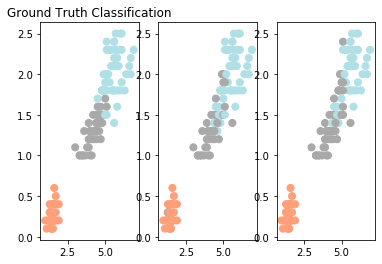

In [0]:
relabel_my=np.choose(r,[2,1,0]).astype(np.int64)
relabel=np.choose(iris.target,[1,0,2]).astype(np.int64)
color_theme=np.array(['darkgray','lightsalmon','powderblue'])
plt.subplot(1,3,1)
plt.scatter(x=iris_df.Petal_length,y=iris_df.Petal_Width,c=color_theme[relabel],s=50)
plt.title('Ground Truth Classification')
plt.subplot(1,3,2)
r=my_clustering.labels(b)
plt.scatter(x=iris_df.Petal_length,y=iris_df.Petal_Width,c=color_theme[relabel_my],s=50)
plt.subplot(1,3,3)
plt.scatter(x=iris_df.Petal_length,y=iris_df.Petal_Width,c=color_theme[clustering.labels_],s=50)

#mid:2, down:1, up:0

In [0]:
print((iris.target[:100]))
print(my_clustering.labels(b[:100]))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [0]:
g=list(relabel-relabel_my)
print("accuracy:",g.count(0)/len(g))

accuracy: 0.8533333333333334
